In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# beautify your plots

In [2]:
import random

In [3]:
df = pd.DataFrame(np.random.normal(size=(25,6)), columns=list("ABCDEF"))
df.head()

,A,B,C,D,E,F
0,-1.328841,0.765531,-0.093116,-0.318488,0.475383,-1.255143
1,-1.122323,-0.510800,-1.619245,1.115265,-0.488938,-1.124161
2,1.268005,-1.675553,0.505453,3.454056,2.361902,-0.991604
3,-1.039543,0.203221,2.058207,1.044751,0.331729,-0.265973
4,-1.961161,-0.331941,-0.107030,0.947246,0.405644,0.055130


In [4]:
%matplotlib inline

Text(0, 0.5, 'ylabel')

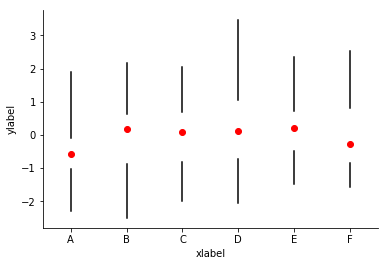

In [5]:
ax = plt.subplots()[1]
for i in range(len(df.columns)):
    col = df.columns[i]
    x = i + 1
    y = df[col].quantile(0.5)
    ax.plot(x, y, 'ro')
    
    # 0.75 to 1 
    y1 = df[col].quantile(0.75)
    y2 = df[col].quantile(1)
    ax.plot((x,x), (y1,y2), 'k')
    
    # 0.25 to 0 
    y1 = df[col].quantile(0.25)
    y2 = df[col].quantile(0)
    ax.plot((x,x), (y1,y2), 'k')

ax.set_xticklabels(df.columns)
ax.set_xticks(range(1, len(df.columns)+1))
ax.set_xlim(0.5, len(df.columns)+0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("xlabel")
plt.ylabel("ylabel")

# geo plotting

In [6]:
import geopandas
from shapely.geometry import Polygon, Point

In [7]:
city = geopandas.read_file("city")
city

,OBJECTID,SHAPESTAre,SHAPESTLen,geometry
0,1348,2.675664e+04,7.126214e+02,POLYGON ((-89.28523345356945 43.02112710884431...
1,1349,1.488101e+05,3.297256e+03,POLYGON ((-89.28049139471618 43.11701006709443...
2,1350,2.262249e+09,1.135798e+06,"POLYGON ((-89.5331291634087 43.0857426328395, ..."
3,1351,5.372867e+05,3.398114e+03,POLYGON ((-89.36924509957318 43.10154266724934...


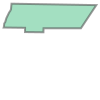

In [8]:
city.iloc[3,3]

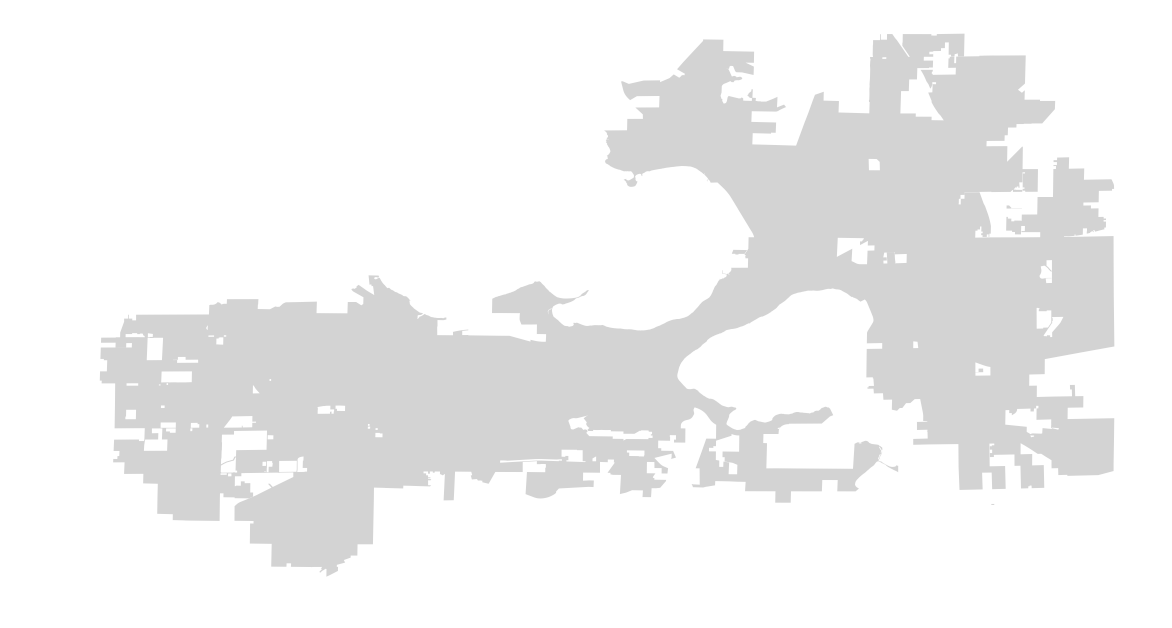

In [9]:
# ax = city.plot(color="lightgray", figsize=(20,20))
# ax.set_axis_off()
# ax.get_figure().savefig("map.eps", bbox_inches="tight")

# animation

In [10]:
city = geopandas.read_file("city")
lakes = geopandas.read_file("lakes2")

In [11]:
def drawFrame(ax, percent):
    # custom points
    buildings = pd.DataFrame([
        {"name":"cs", "loc": Point(-89.406749 + percent*0.01, 43.071478)},
        {"name":"capital", "loc": Point(-89.384054, 43.074617 + percent*0.01)},
    ])
    buildings = geopandas.GeoDataFrame(buildings, geometry="loc")
    
    ax.cla()
    city.plot(color="lightgray", figsize=(12,12), ax=ax)
    lakes.plot(color="darkgray", ax=ax)
    buildings.plot(color="black", marker="x", markersize=200, ax=ax)
    ax.set_axis_off()
    
    if percent > 10:
        ax.text(-89.384054, 43.074617, "error")

In [12]:
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib import animation 
%matplotlib inline

In [13]:
%%capture 
fig, ax = plt.subplots()

In [ ]:
# SECONDS = 5
# INTERVAL_MS = 250
# TOTAL_FRAMES = int(SECONDS * 1000 / INTERVAL_MS)

# def update(frame_num):
#     print("here")
#     drawFrame(ax, frame_num/TOTAL_FRAMES)
    
# vid = animation.FuncAnimation(fig, update, frames=TOTAL_FRAMES, interval=INTERVAL_MS)
# html = vid.to_html5_video()
# HTML(html)

## Graph

In [2]:
from graphviz import Digraph

In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/CSY/Anaconda3/Library/bin/graphviz'

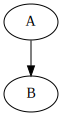

In [5]:
g = Digraph()
g.node("A")
g.node("B")
g.edge("A","B")
g

In [8]:
from collections import defaultdict
routes = {
    "A": [1, 5, 7, 9, 12, 19],
    "B": [25, 12, 11, 7, 2]
}

stop_counts = defaultdict(int)
important = set() # end points and transfer points

In [9]:
for stops in routes.values():
    # end points
    important.add(stops[0])
    important.add(stops[-1])
    for stop in stops:
        stop_counts[stop] += 1

# transfer points appear twice
for stop in stop_counts:
    if stop_counts[stop] > 1:
        important.add(stop)

# filter original routes to only include important points
for k in routes:
    routes[k] = [stop for stop in routes[k] if stop in important]
routes

{'A': [1, 7, 12, 19], 'B': [25, 12, 7, 2]}

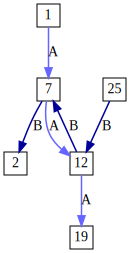

In [10]:
g = Digraph()

# draw nodes
g.attr('node', width="0", height="0", margin="0.05", shape="square")
for stop in important:
    g.node(str(stop))

# draw edges
colors = ["#6666FF", "#000099"]
for route, stops in routes.items():
    g.attr('edge', color=colors.pop(0), penwidth="1.5")
    for i in range(len(stops) - 1):
        g.edge(str(stops[i]), str(stops[i+1]), str(route))

g

## scikit learn

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df = shuffle(df)
middle = len(df) // 2
trainX = df.iloc[:middle, :-1]
trainy = df.iloc[:middle, -1]
testX = df.iloc[middle:, :-1]
testy = df.iloc[middle:, -1]

In [13]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(trainX, trainy)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
with open("out.dot", "w") as f:
    export_graphviz(tree, out_file=f, feature_names=df.columns[:-1])

In [ ]:
# dot out.dot -T png -o output.png

In [15]:
tree.predict(testX.iloc[0:1, :])
(tree.predict(testX) == testy).value_counts()

True     279
False    105
Name: Outcome, dtype: int64

In [1]:
import torch
from torch import tensor, sigmoid, mm

ModuleNotFoundError: No module named 'torch'

pytorch go to see 12-pytorch. 